In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('1673873196_hr_comma_sep.xlsx')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape[0]

14999

# 	Perform data quality check by checking for missing values if any.

In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

  **OBSERVATIONS: There are no missing values**

In [6]:
#Statistical overview of the company
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


**Observations:**
**24% of the employees have left the company.**
**Mean satisfaction level of the employees is about 61%.**


# Heatmap of the Correlation Matrix between all numerical features/columns in the data.

<AxesSubplot:>

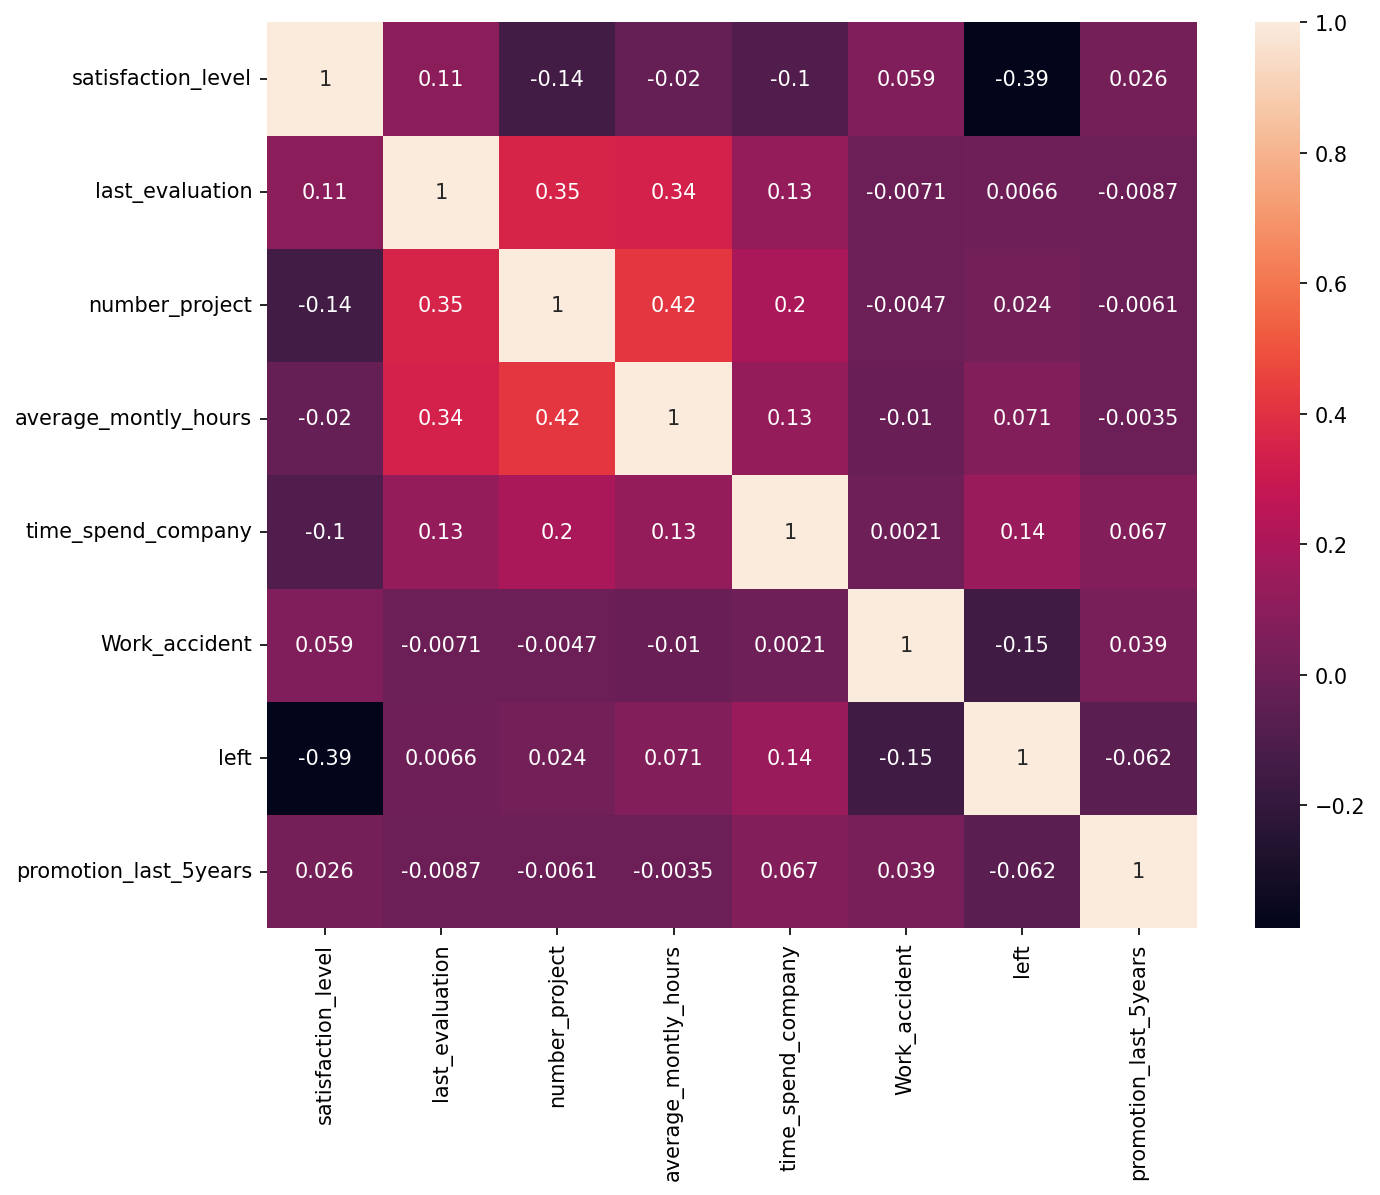

In [7]:
plt.figure(figsize=(10,8),dpi=150)
sns.heatmap(df.corr(),annot=True,)

**OBSERVATIONS:**

Average_monthly_hours vs number_project have moderate positive corelation of 0.42 
last_evaluation vs number_project have positive corelation of 0.35
Average_monthly_hours vs last_evaluation have positive corelation of 0.34.

From the heatmap we can infer that the employees who spend more hours working are do more number of projects 
are likely to be highly evaluated.

# Distribution plot of Employee satisfaction



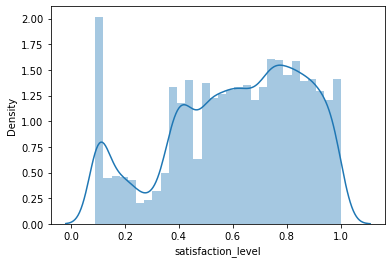

In [8]:
sns.distplot(df["satisfaction_level"],) ;


# Distribution plot of Employee evaluation

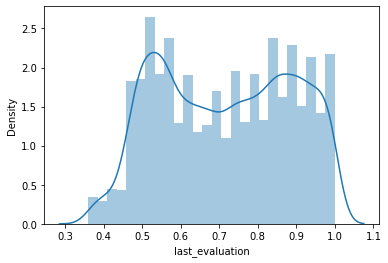

In [9]:
sns.distplot(df["last_evaluation"]) ;  

# Distribution plot of Employee Average Monthly Hours

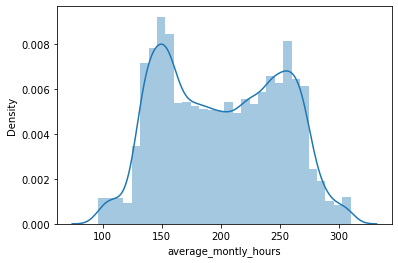

In [10]:
sns.distplot(df["average_montly_hours"]);

In [11]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

# Employee turnover vs  Salary

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Text(0.5, 1.0, 'Employee turnover vs  Salary')

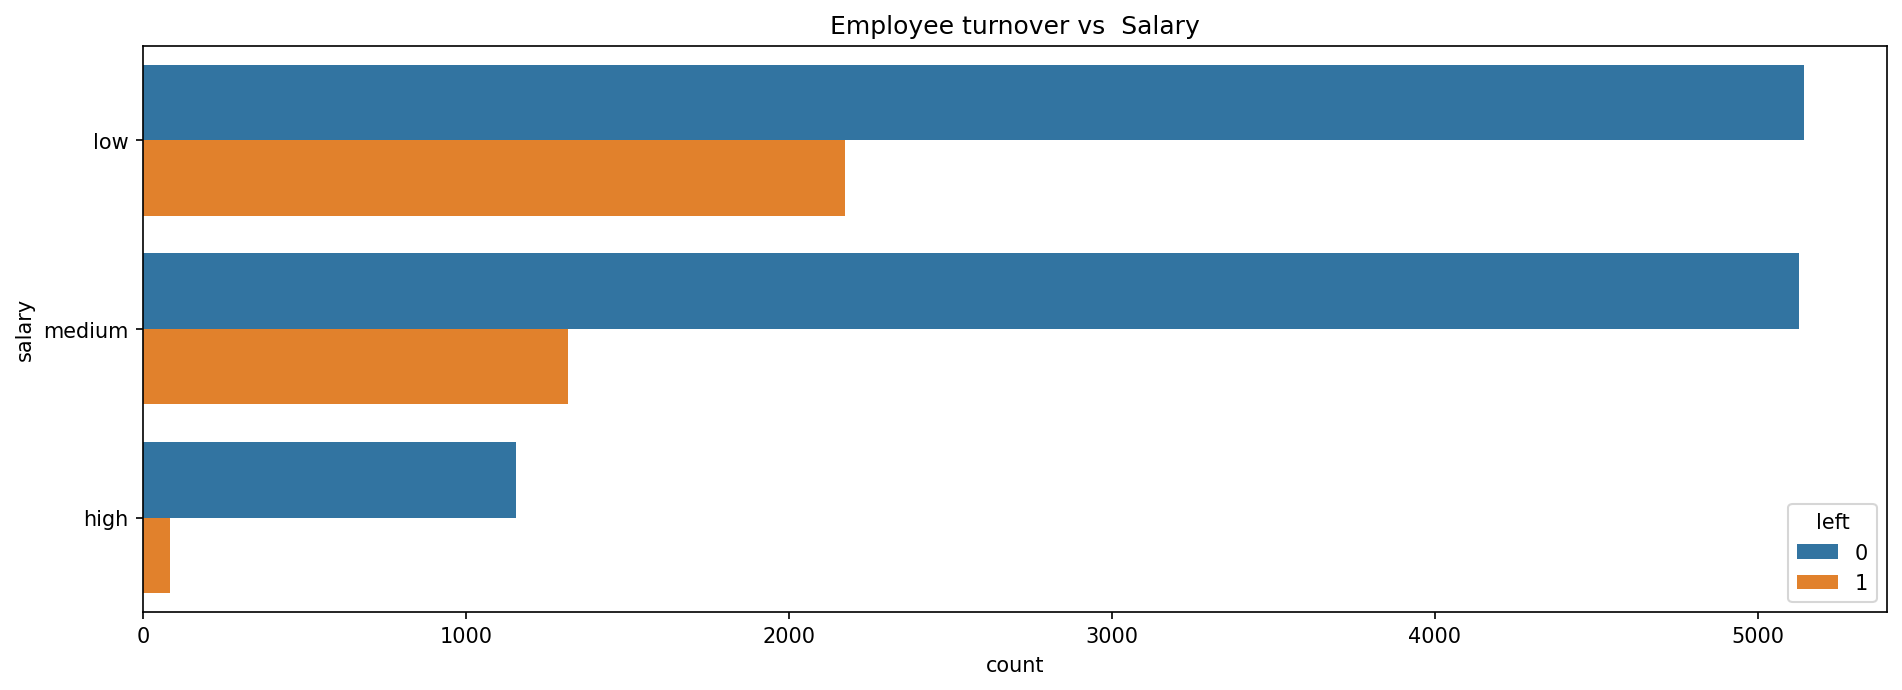

In [13]:
plt.figure(figsize=(15,5),dpi=150)
sns.countplot(y='salary',hue='left',data=df)
plt.title('Employee turnover vs  Salary')

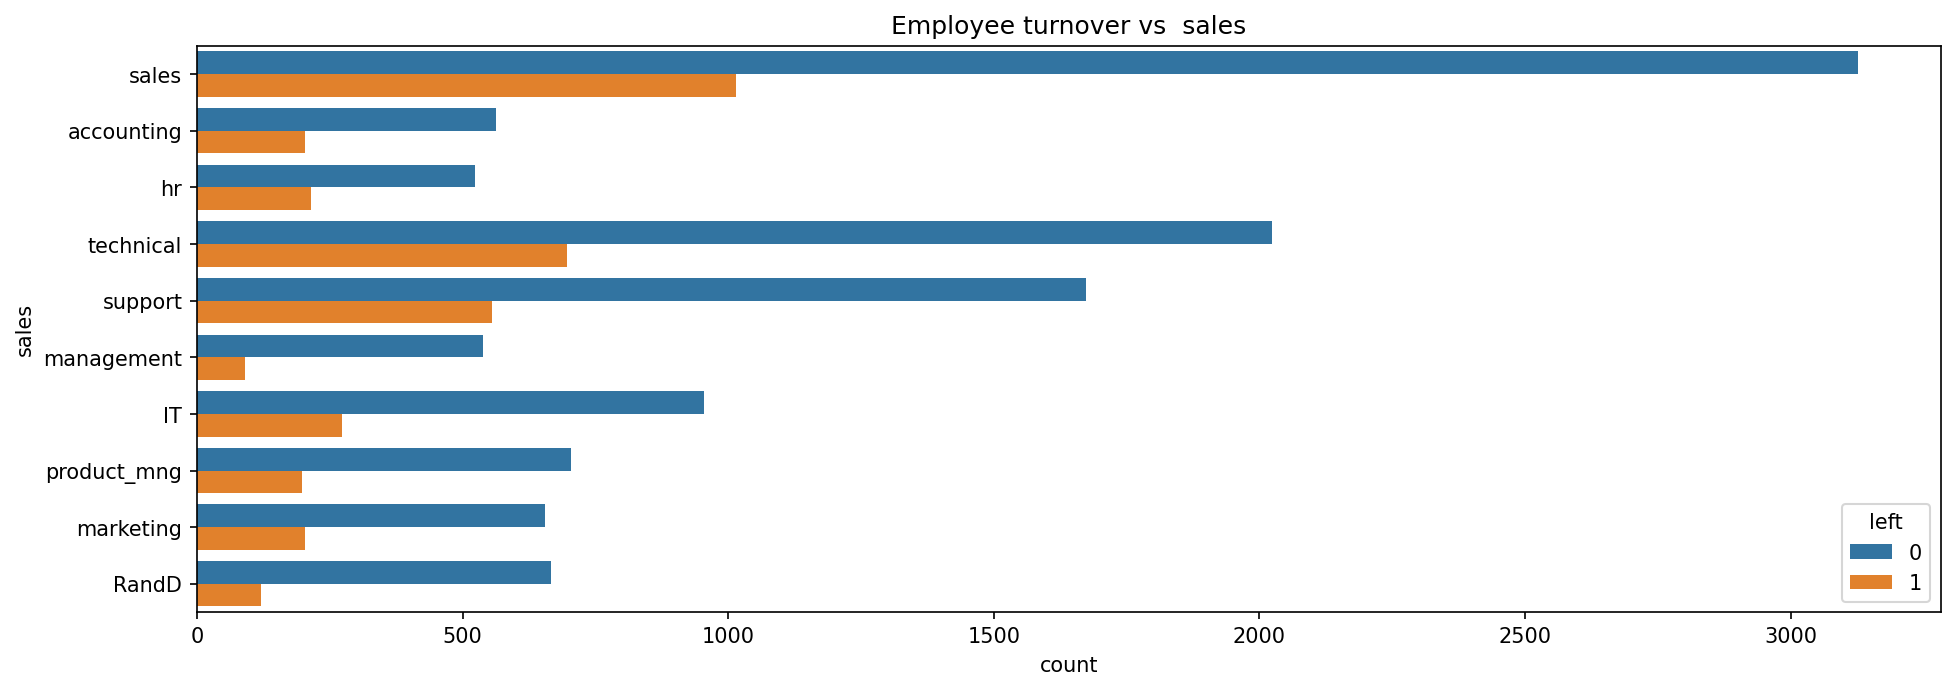

In [14]:
plt.figure(figsize=(15,5),dpi=150)
sns.countplot(y='sales',hue='left',data=df);
plt.title('Employee turnover vs  sales');

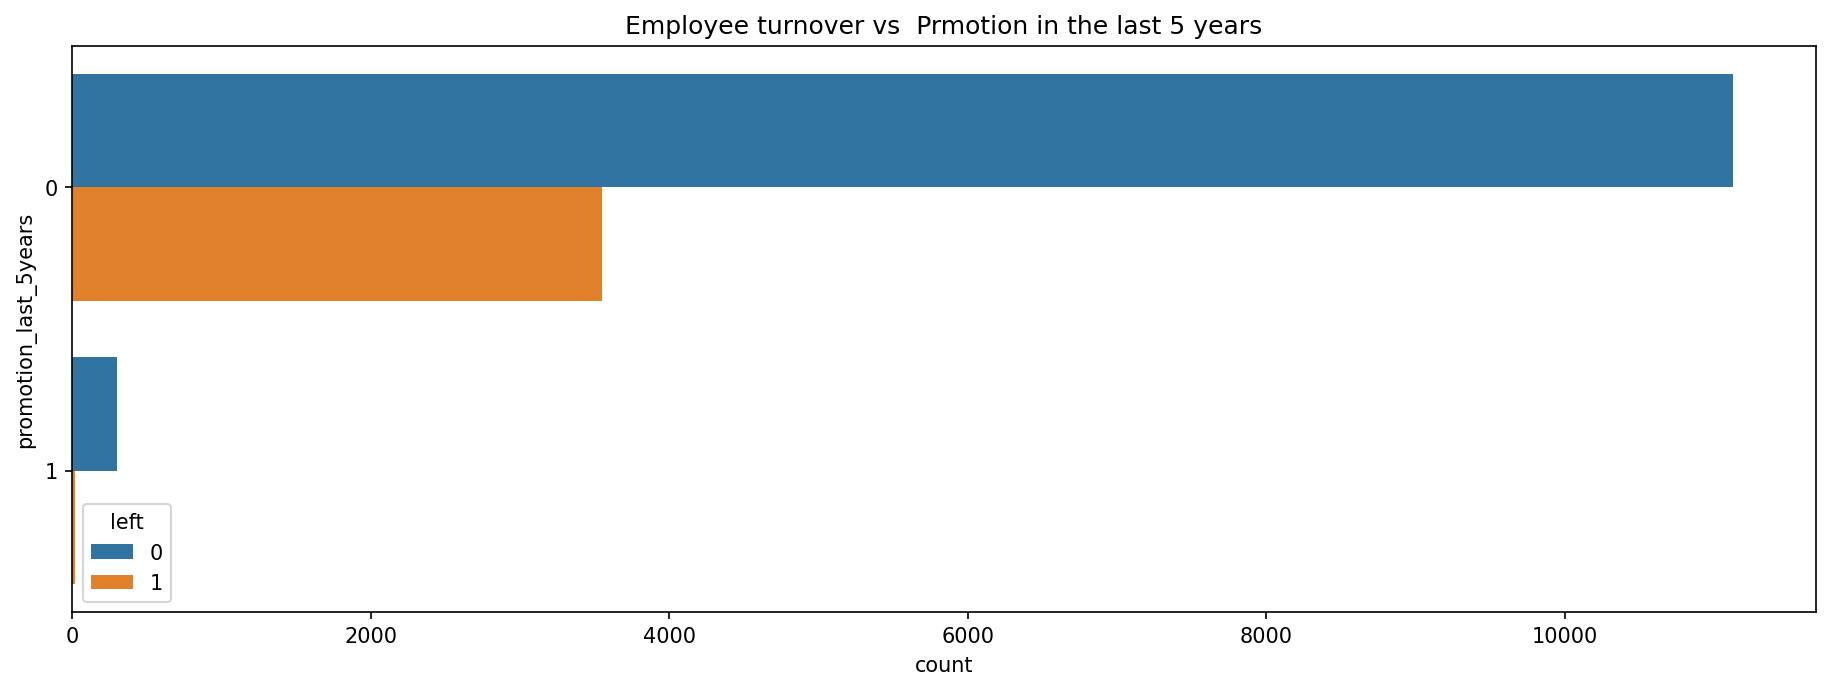

In [15]:
plt.figure(figsize=(15,5),dpi=150)
sns.countplot(y='promotion_last_5years',hue='left',data=df);
plt.title('Employee turnover vs  Prmotion in the last 5 years');

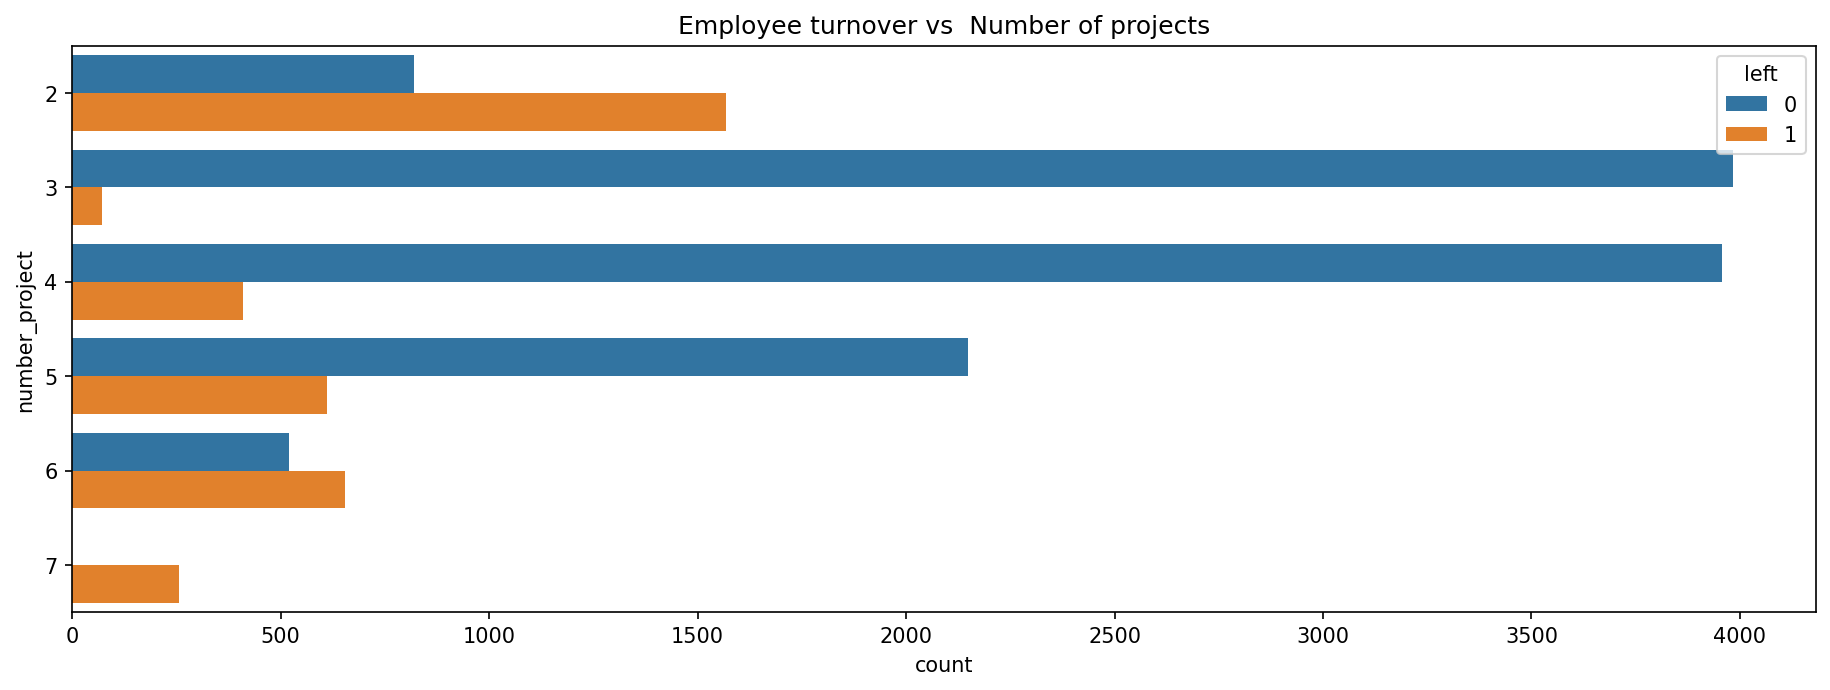

In [16]:
plt.figure(figsize=(15,5),dpi=150)
sns.countplot(y='number_project',hue='left',data=df);
plt.title('Employee turnover vs  Number of projects');

**INSIGHTS FROM THE DATA**

Low and medium salary range have most number of employees left.Employee with higher salary is highly unlikely to leave the 
company.



In terms of department,the sales and technical department have highest number of employees leaving with  least in 
mangement department.

The employees who have not been  promoted in the last five years are likely to leave the company.

The employees working on fewer number of projects are leaving the company.Those working on 3-4 projects are still in the company.
As the number of projects is increasing the number of employees leaving is also increasing.The employees with seven projects done have 
left the company which implies those employees have been exploited.

#  Bar plot of Employee Project Count of both employees who left and who stayed in the organization

<AxesSubplot:xlabel='left', ylabel='number_project'>

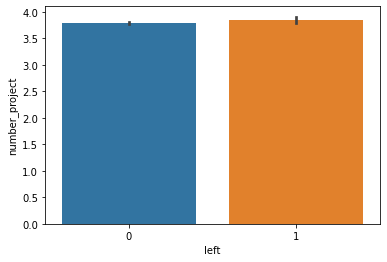

In [17]:

sns.barplot(x=df['left'],y=df['number_project'])




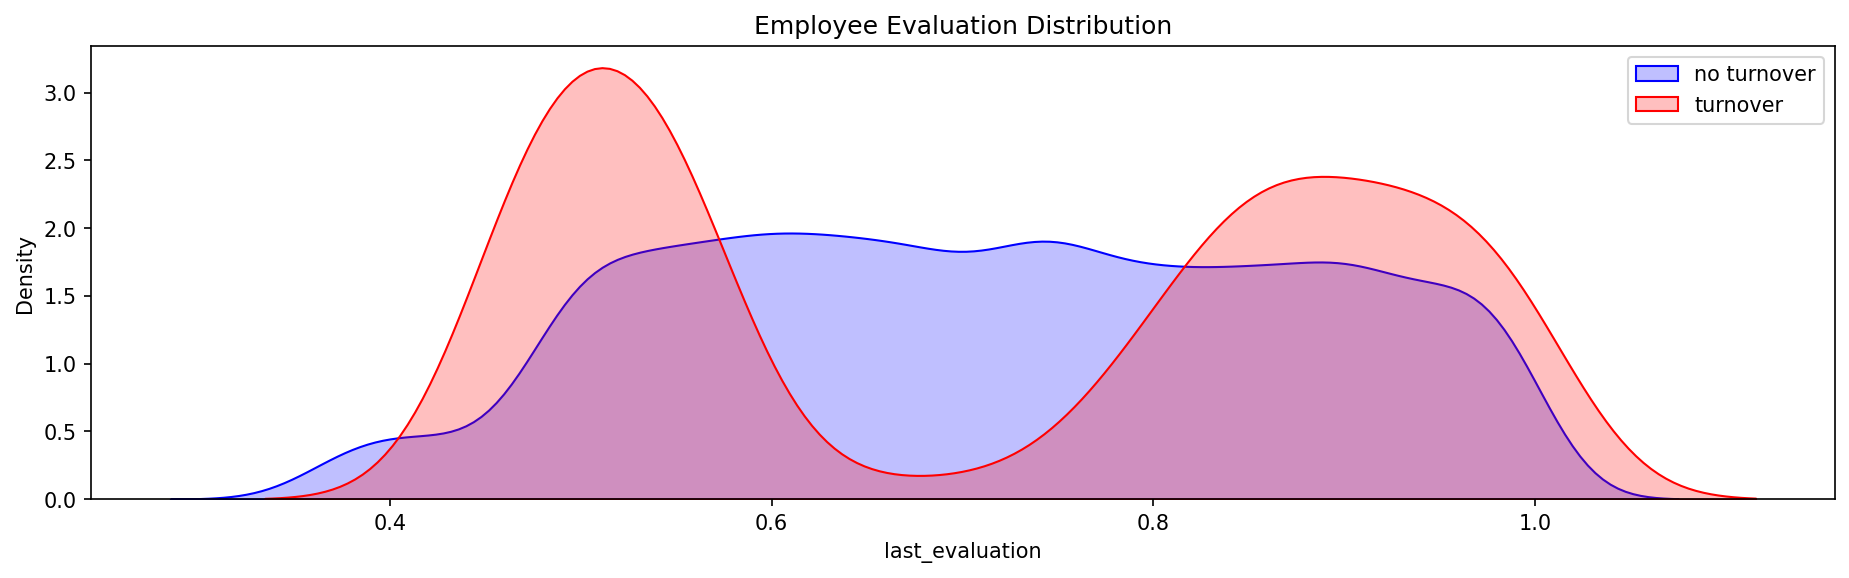

In [18]:
fig = plt.figure(figsize=(15,4),dpi=150)
sns.kdeplot(df.loc[(df['left'] == 0),'last_evaluation'] , color='b',shade=True,label='no turnover');
sns.kdeplot(df.loc[(df['left'] == 1),'last_evaluation'] , color='r',shade=True, label='turnover');
plt.legend()
plt.title('Employee Evaluation Distribution');

**INSIGHTS**

The employees who left the company either are poor performing or high performing.

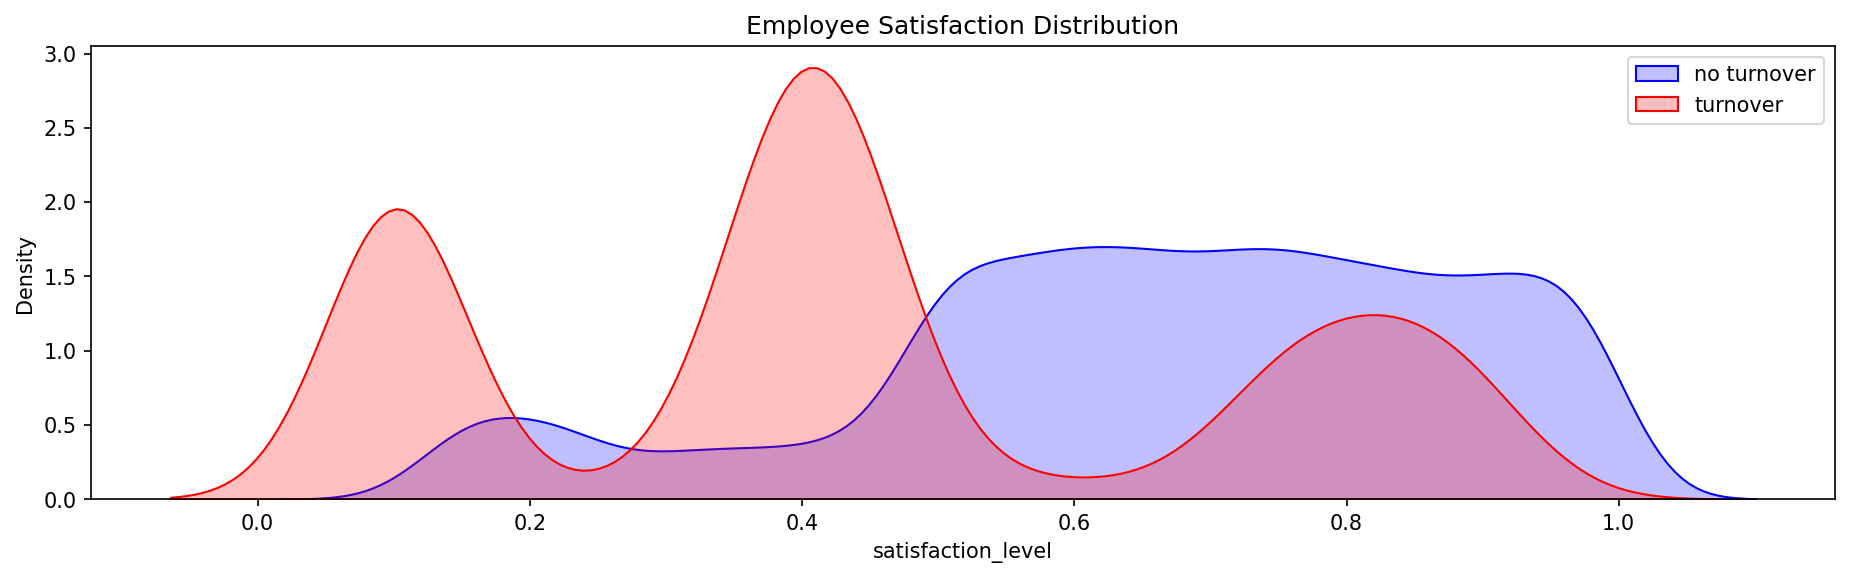

In [19]:
fig = plt.figure(figsize=(15,4),dpi=150)
sns.kdeplot(df.loc[(df['left'] == 0),'satisfaction_level'] , color='b',shade=True,label='no turnover');
sns.kdeplot(df.loc[(df['left'] == 1),'satisfaction_level'] , color='r',shade=True, label='turnover');
plt.legend()
plt.title('Employee Satisfaction Distribution');

**INSIGHTS**

The employees with higher satisfaction level stayed.

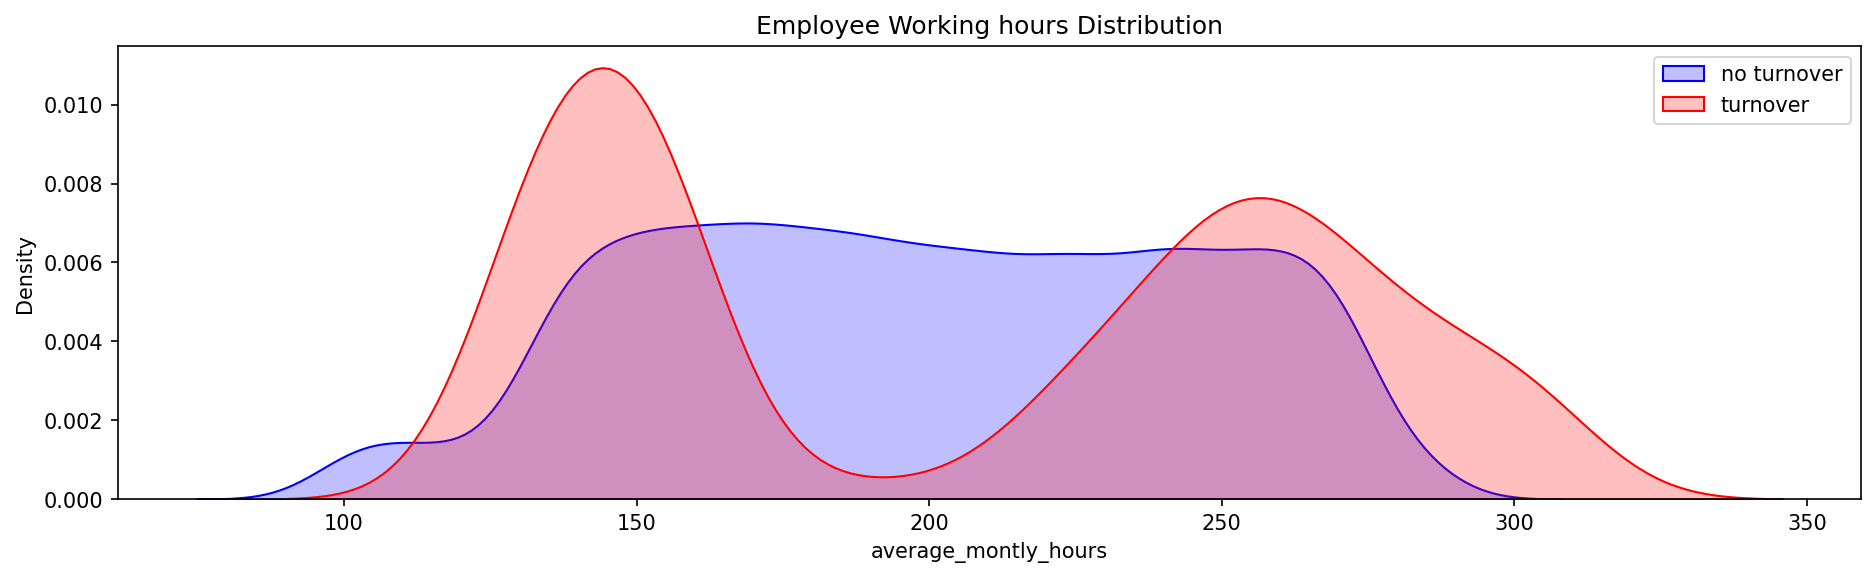

In [20]:
fig = plt.figure(figsize=(15,4),dpi=150)
sns.kdeplot(df.loc[(df['left'] == 0),'average_montly_hours'] , color='b',shade=True,label='no turnover');
sns.kdeplot(df.loc[(df['left'] == 1),'average_montly_hours'] , color='r',shade=True, label='turnover');
plt.legend()
plt.title('Employee Working hours Distribution');

**INSIGHTS**

Employees who are either working less or workinng more are likely to leave the company.

# Clustering on the basis of satisfaction and evaluation

In [21]:
X=df[['satisfaction_level','last_evaluation','left']].values
X



array([[0.38, 0.53, 1.  ],
       [0.8 , 0.86, 1.  ],
       [0.11, 0.88, 1.  ],
       ...,
       [0.37, 0.53, 1.  ],
       [0.11, 0.96, 1.  ],
       [0.37, 0.52, 1.  ]])

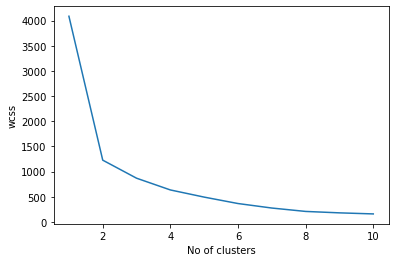

In [22]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=44)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [23]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=44)
y_kmeans=kmeans.fit_predict(X)

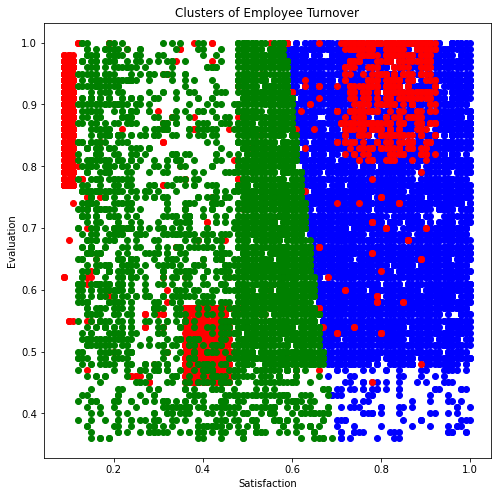

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],color="blue")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],color="red")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],color="green")
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.title("Clusters of Employee Turnover");

# Handle the left Class Imbalance using SMOTE technique.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [26]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [27]:
df.loc[:,['sales','salary']]=df.loc[:,['sales','salary']].apply(enc.fit_transform)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  int32  
 9   salary                 14999 non-null  int32  
dtypes: float64(2), int32(2), int64(6)
memory usage: 1.0 MB


In [29]:
from sklearn.model_selection import train_test_split
X=df.drop('left',axis=1)
y=df.left

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=123)

In [31]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
smote=SMOTE()

In [34]:
X_train_smote,y_train_smote=smote.fit_resample(X_train.astype('float'),y_train)

In [35]:
from collections import Counter

In [36]:
print(Counter(y_train))
print(Counter(y_train_smote))

Counter({0: 9137, 1: 2862})
Counter({0: 9137, 1: 9137})


# MODELING THE DATA

In [37]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
classification_models=[]
classification_models.append(('Logistic Regression',LogisticRegression()))
classification_models.append(('Random Forest Classifier',RandomForestClassifier(n_estimators=100,criterion='entropy')))
classification_models.append(('Gradient Boosting Classifier',GradientBoostingClassifier(learning_rate=0.01 , n_estimators=100 ,max_depth=2)))






In [39]:
for name,model in classification_models:
    kfold=KFold(n_splits=5,random_state=123,shuffle=True)
    result=cross_val_score(model,X_train_smote,y_train_smote,cv=kfold,scoring='accuracy')
    print('Mean Accuracy : ', name,result.mean()*100)

Mean Accuracy :  Logistic Regression 75.98780864925494
Mean Accuracy :  Random Forest Classifier 99.17916912822331
Mean Accuracy :  Gradient Boosting Classifier 88.4043377308154


In [40]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report,ConfusionMatrixDisplay


In [41]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

Logistic Regression               precision    recall  f1-score   support

           0       0.91      0.74      0.82      2291
           1       0.48      0.77      0.59       709

    accuracy                           0.75      3000
   macro avg       0.70      0.76      0.71      3000
weighted avg       0.81      0.75      0.76      3000

Random Forest Classifier               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2291
           1       0.99      0.98      0.98       709

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Gradient Boosting Classifier               precision    recall  f1-score   support

           0       0.98      0.82      0.89      2291
           1       0.62      0.94      0.75       709

    accuracy                           0.85      3000
   macro avg       0.80      0.88      0.82      3000


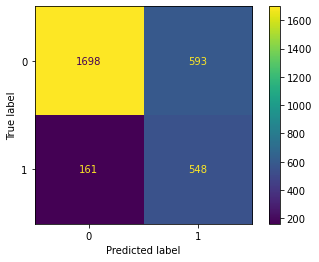

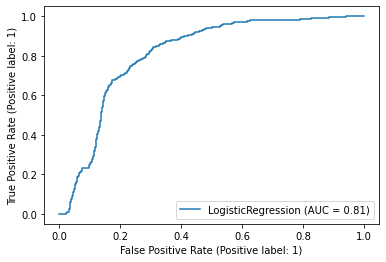

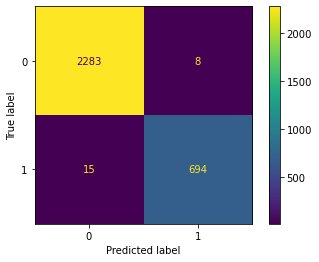

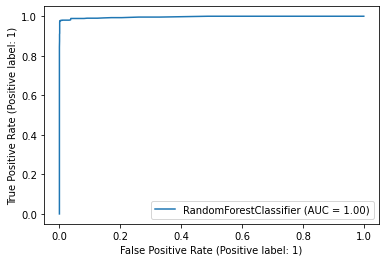

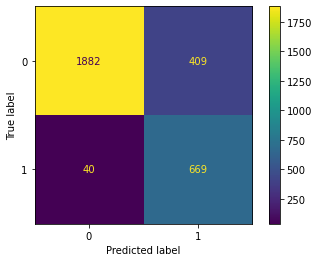

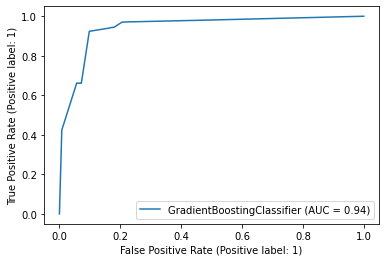

In [42]:
for name,model in classification_models:
    model.fit(X_train_smote,y_train_smote)
    pred=model.predict(X_test)
    print(name,classification_report(y_test,pred)) 
    plot_confusion_matrix(model,X_test,y_test);
    roc=plot_roc_curve(model,X_test,y_test)
    

# Choosing the best model

In [43]:
rndm=RandomForestClassifier(n_estimators=100,criterion='entropy')

In [44]:
rndm.fit(X_train_smote,y_train_smote)
rndm_pred=rndm.predict(X_test)


In [45]:
probability = rndm.predict_proba(X_test)

In [46]:
probability[:,1]

array([0.01, 0.01, 0.  , ..., 1.  , 0.  , 0.  ])

In [47]:
zone=[]
prob=[]

for i in probability[:,1]:
  prob.append(i)
  if (i<=0.2):
    zone.append("Safe Zone")    
  elif (i>0.2 and i<=0.6):
    zone.append("Low Risk Zone")
  elif (i>0.6 and i<=0.9):
    zone.append("Medium Risk Zone ")
  else:
    zone.append("High Risk Zone ")

In [50]:
clrr = pd.DataFrame({"zone":zone,"probability":prob})
def color(zone):
    if 'Safe Zone' in zone:
        
        x='green'
        return x
    elif 'Low Risk Zone' in zone:
        x='yellow'
        return x
    elif 'Medium Risk Zone'in zone: 
         x= 'orange'
         return x
    else:
        x='Red'
        return x
        
    

In [51]:

clrr["Color"] = clrr["zone"].apply(color)
clrr

,zone,probability,Color
0,Safe Zone,0.01,green
1,Safe Zone,0.01,green
2,Safe Zone,0.00,green
3,Safe Zone,0.15,green
4,Safe Zone,0.00,green
...,...,...,...
2995,High Risk Zone,1.00,Red
2996,Safe Zone,0.00,green
2997,High Risk Zone,1.00,Red
2998,Safe Zone,0.00,green


<AxesSubplot:ylabel='count'>

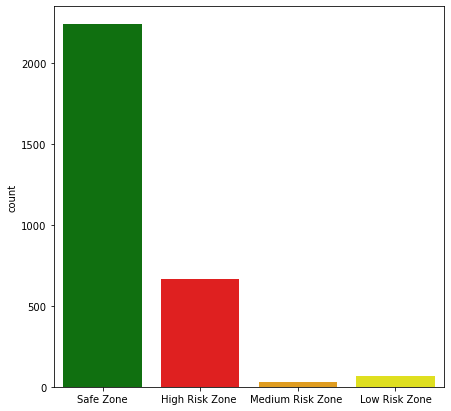

In [52]:
c = ["Green","Red","Orange","Yellow"]
plt.figure(figsize=(7,7))
sns.countplot(zone,palette=c)
     